In [2]:
import numpy as np 
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("data.csv")

In [4]:
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [5]:
df=df[['age','bp','sg','al','su','rbc','pc','pcc','ba','appet','pe','ane','classification']]

In [6]:
df

,age,bp,sg,al,su,rbc,pc,pcc,ba,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,good,no,no,notckd
396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,good,no,no,notckd
397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,good,no,no,notckd
398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,good,no,no,notckd


In [7]:
df=df.replace(to_replace=["ckd"],
           value=0)
df=df.replace(to_replace=["notckd"],
           value=1)
df=df.replace(to_replace=["ckd\t"],
           value=0)

In [8]:
df=df.replace(to_replace=["normal","notpresent","good","no"],
           value=0)
df=df.replace(to_replace=["abnormal","present","poor","yes"],
           value=1)

In [9]:
df

,age,bp,sg,al,su,rbc,pc,pcc,ba,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0
1,7.0,50.0,1.020,4.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0
2,62.0,80.0,1.010,2.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0
3,48.0,70.0,1.005,4.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0
4,51.0,80.0,1.010,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
396,42.0,70.0,1.025,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
397,12.0,80.0,1.020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
398,17.0,60.0,1.025,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             391 non-null    float64
 1   bp              388 non-null    float64
 2   sg              353 non-null    float64
 3   al              354 non-null    float64
 4   su              351 non-null    float64
 5   rbc             248 non-null    float64
 6   pc              335 non-null    float64
 7   pcc             396 non-null    float64
 8   ba              396 non-null    float64
 9   appet           399 non-null    float64
 10  pe              399 non-null    float64
 11  ane             399 non-null    float64
 12  classification  400 non-null    int64  
dtypes: float64(12), int64(1)
memory usage: 40.8 KB


In [11]:
df.isna().sum()

age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [12]:
df['age']=df['age'].fillna(df['age'].mean())
df['bp']=df['bp'].fillna(df['bp'].mean())
df['sg']=df['sg'].fillna(df['sg'].mean())
df['al']=df['al'].fillna(df['al'].mean())
df['su']=df['su'].fillna(df['su'].mean())
df['rbc']=df['rbc'].fillna(df['rbc'].mean())
df['pc']=df['pc'].fillna(df['pc'].mean())
df['pcc']=df['pcc'].fillna(df['pcc'].mean())
df['ba']=df['ba'].fillna(df['ba'].mean())
df['appet']=df['appet'].fillna(df['appet'].mean())
df['pe']=df['pe'].fillna(df['pe'].mean())
df['ane']=df['ane'].fillna(df['ane'].mean())

In [13]:
df.isna().sum()

age               0
bp                0
sg                0
al                0
su                0
rbc               0
pc                0
pcc               0
ba                0
appet             0
pe                0
ane               0
classification    0
dtype: int64

In [14]:
df.describe()

,age,bp,sg,al,su,rbc,pc,pcc,ba,appet,pe,ane,classification
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,0.189516,0.226866,0.106061,0.055556,0.205514,0.190476,0.150376,0.375000
std,16.974966,13.476298,0.005369,1.272318,1.029487,0.308983,0.383750,0.306755,0.228199,0.404077,0.392677,0.357440,0.484729
min,2.000000,50.000000,1.005000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,42.000000,70.000000,1.015000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,54.000000,78.234536,1.017408,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,64.000000,80.000000,1.020000,2.000000,0.450142,0.189516,0.226866,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,90.000000,180.000000,1.025000,5.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [15]:
df.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'appet', 'pe',
       'ane', 'classification'],
      dtype='object')

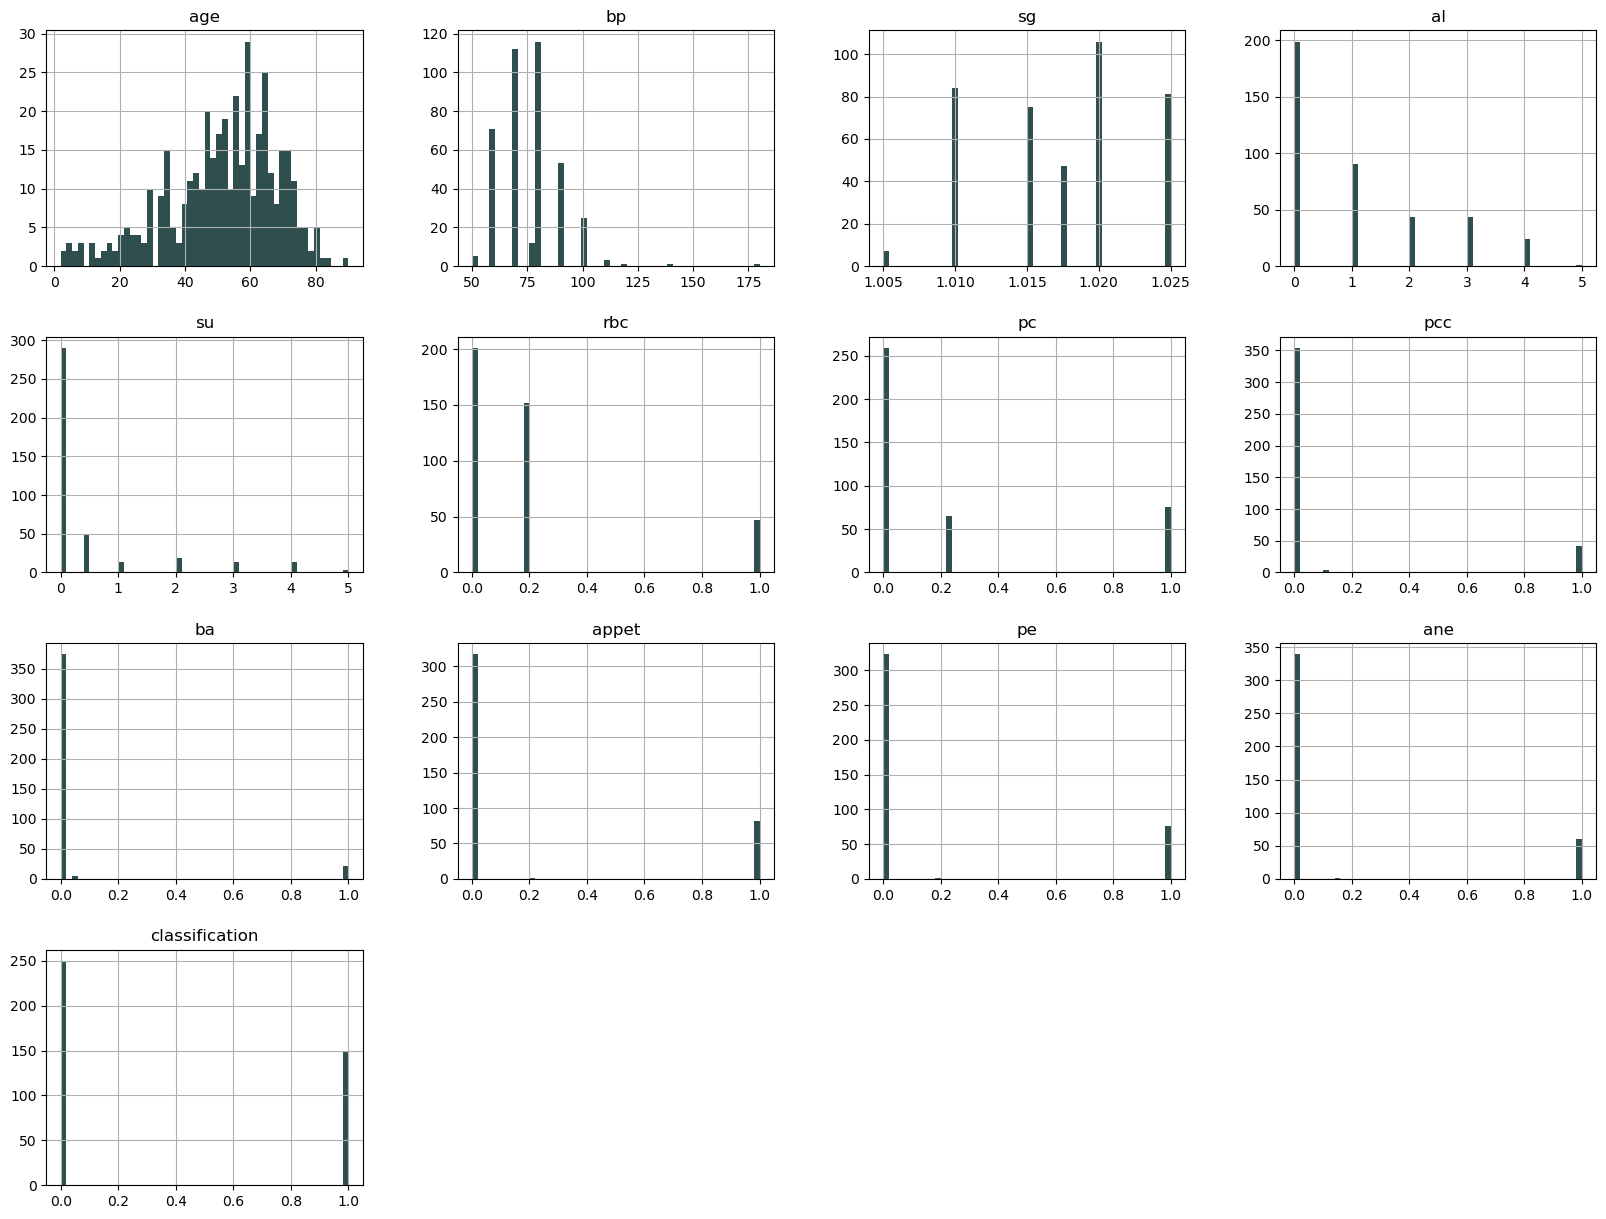

In [16]:
df.hist(bins=50, figsize =(20,15), color = 'darkslategrey')
plt.show(block=False)

<Axes: >

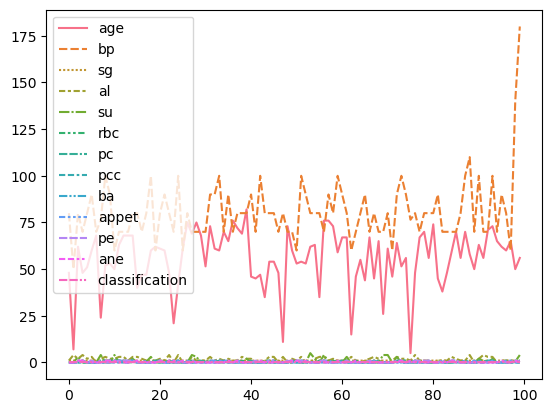

In [17]:
sns.lineplot(data=df.head(100))

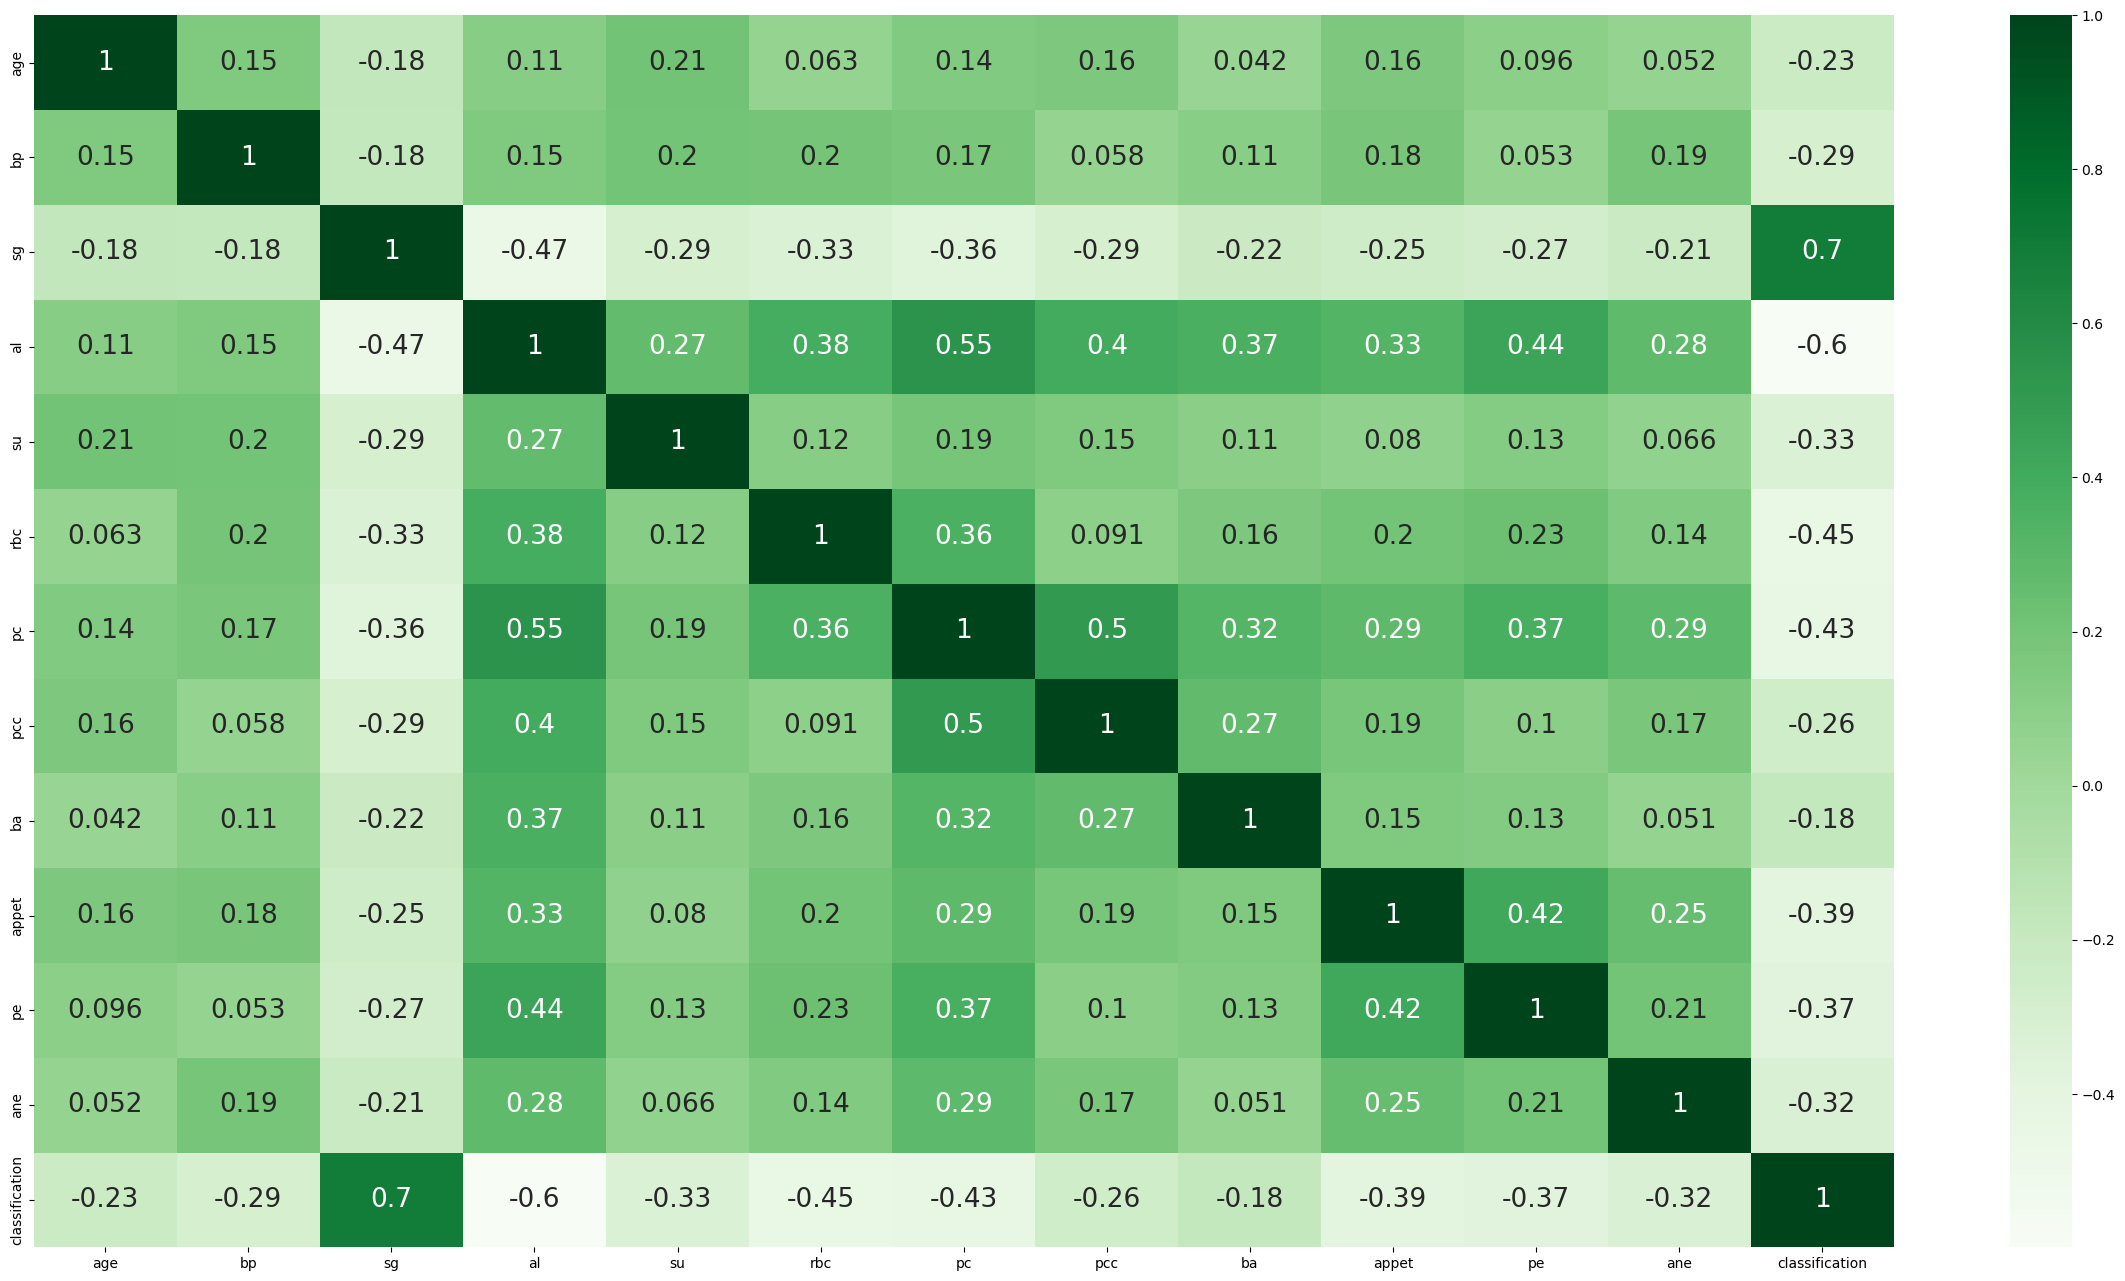

In [18]:
plt.figure(figsize=(30,16))
sns.heatmap(df.corr(), annot = True, cmap = 'Greens',annot_kws={'size':19})
plt.show()

In [19]:
df

,age,bp,sg,al,su,rbc,pc,pcc,ba,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,0.189516,0.0,0.0,0.0,0.0,0.0,0.0,0
1,7.0,50.0,1.020,4.0,0.0,0.189516,0.0,0.0,0.0,0.0,0.0,0.0,0
2,62.0,80.0,1.010,2.0,3.0,0.000000,0.0,0.0,0.0,1.0,0.0,1.0,0
3,48.0,70.0,1.005,4.0,0.0,0.000000,1.0,1.0,0.0,1.0,1.0,1.0,0
4,51.0,80.0,1.010,2.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1
396,42.0,70.0,1.025,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1
397,12.0,80.0,1.020,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1
398,17.0,60.0,1.025,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1


In [20]:
X=df.drop(['classification'],axis=1)
y=df["classification"]

In [21]:
X

,age,bp,sg,al,su,rbc,pc,pcc,ba,appet,pe,ane
0,48.0,80.0,1.020,1.0,0.0,0.189516,0.0,0.0,0.0,0.0,0.0,0.0
1,7.0,50.0,1.020,4.0,0.0,0.189516,0.0,0.0,0.0,0.0,0.0,0.0
2,62.0,80.0,1.010,2.0,3.0,0.000000,0.0,0.0,0.0,1.0,0.0,1.0
3,48.0,70.0,1.005,4.0,0.0,0.000000,1.0,1.0,0.0,1.0,1.0,1.0
4,51.0,80.0,1.010,2.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
396,42.0,70.0,1.025,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
397,12.0,80.0,1.020,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
398,17.0,60.0,1.025,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(320, 12) (80, 12) (320,) (80,)


In [27]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier()
KNN.fit(X_train, y_train)

KNeighborsClassifier()

In [28]:
print(KNN.score(X_train, y_train))

0.8625


In [29]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [30]:
print(gnb.score(X_train, y_train))

0.915625


In [33]:
from sklearn import svm
svm = svm.SVC(kernel='linear')  # Linear Kernel
svm.fit(X_train, y_train)

SVC(kernel='linear')

In [34]:
print(svm.score(X_train, y_train))

0.9375


In [35]:
Result= svm.predict(np.array([[48.0,80.0,1.020,1.0,0.0,0.189516,0.0,0.0,0.0,0.0,0.0,0.0]]))

In [36]:
if Result[0]==1:
   print('Output : ', 'Chronic Kidney Disease')
else:
   print('Output : ', 'Healthy')

Output :  Healthy


In [37]:
Result= svm.predict(np.array([[58.0,80.0,1.025,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0]]))

In [38]:
if Result[0]==1:
   print('Output : ', 'Chronic Kidney Disease')
else:
   print('Output : ', 'Healthy')

Output :  Chronic Kidney Disease


In [39]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
SVM_filename = 'SVM.pkl'
# Open the file to save as pkl file
SVM_Model_pkl = open(SVM_filename, 'wb')
pickle.dump(svm, SVM_Model_pkl)
# Close the pickle instances
SVM_Model_pkl.close()